## ARMA Modeling: Unit Root Testing

**Functions**

`arch.unitroot.ADF` 

### Exercise 72
Download data on the AAA and BAA yields (Moodys) from FRED and construct the
default premium as the difference between these two.

1. Test the default premium for a unit root. 
2. If you find a unit root, test the change.

### Loading the Data

Let's begin by downloading the data using the **pandas_datareader**:

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

In [2]:
# Downloading the data
aaa = pdr.get_data_fred("AAA", start="1950")
baa = pdr.get_data_fred("BAA", start="1950")

In [3]:
# Building the default series
default = baa["BAA"] - aaa["AAA"]
default.name = "Default"

Now we can check how this series looks like:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

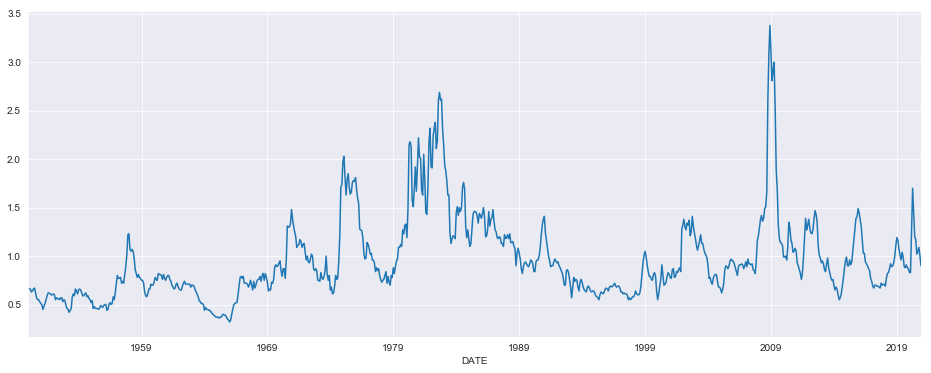

In [5]:
# Plotting the series
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16,6))
default.plot.line()

As we can see, different to the term premium, the default premium has never been negative. Again, this makes sense. Given that the only difference between AAA yields and BAA yields is the risk profile, BAA bonds should always pay a premium. Since, ceteris paribus, the higher the risk of a bond, the higher should be its yield. 


Turning to the question itself, it is hard to tell if the default premium is a unit root simply by looking at the figure above. The series seems fairly well behaved during most of the time. Nevertheless, there are some significant jumps during what loos like financial crises. But this is not a problem! As you have seen with Kevin, there is a formal test we can perform in order to check if a series possesses a unit root. 

### Dickey Fuller Test

We will use the **arch** package to perform an ADF test. You probably don't have it yet, so we should first download it.

In [6]:
%conda install -c bashtage arch

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Loading the arch package:

In [7]:
from arch.unitroot import ADF

We can use it to perform the Augmented Dickey Fuller test. Let's take a look into Kevin's notes to remember what these tests do.

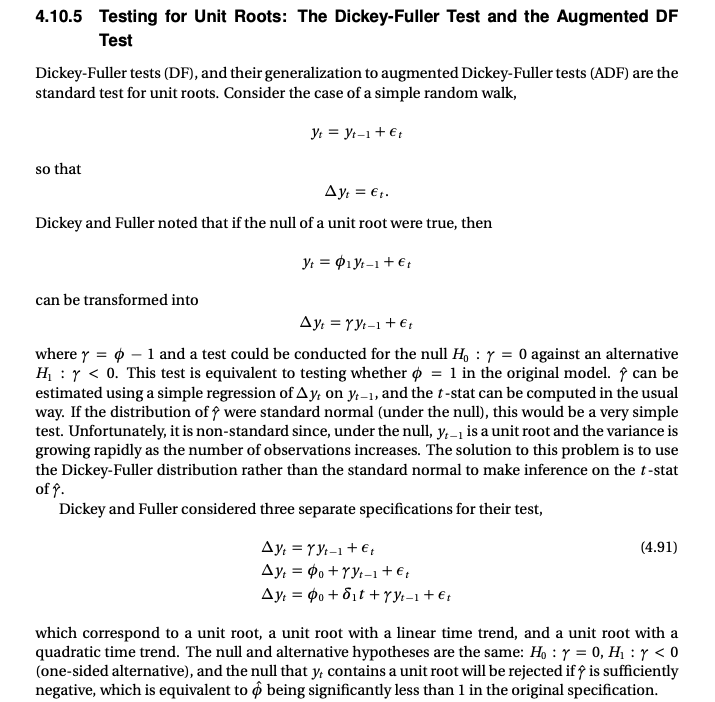

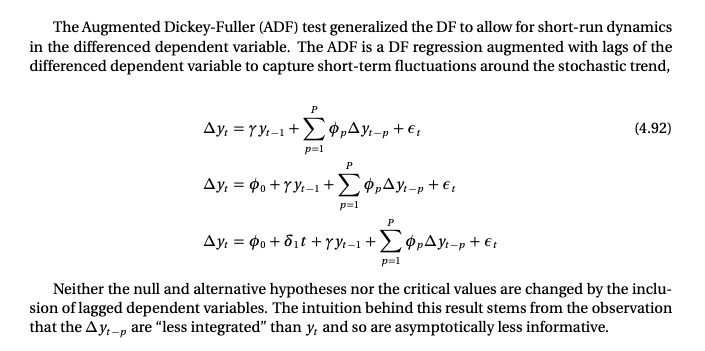

Finally, we can use the **ADF** class to perform the test. Documentation can be found at: [ADF Doc](https://arch.readthedocs.io/en/latest/unitroot/generated/arch.unitroot.ADF.html).

In [8]:
# Starting with no trend components
adf = ADF(default, trend='n')
adf.summary()

Test Statistic,-1.094
P-value,0.248
Lags,16


In [9]:
# Including a constant
adf = ADF(default, trend='c')
adf.summary()

Test Statistic,-3.506
P-value,0.008
Lags,16


We can also see how many lags **ADF** has decided to include in our test by looking at the summary of the results:

In [10]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     11.01
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           2.81e-27
Time:                        19:44:19   Log-Likelihood:                 762.24
No. Observations:                 835   AIC:                            -1488.
Df Residuals:                     817   BIC:                            -1403.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0325      0.009     -3.506      0.000      -0.051      -0.014
Diff.L1        0.3652      0.035     10.444      0.000       0.297       0.434
Diff.L2       -0.1394      0.037     -3.754      0.000      -0.212      -0.067
Diff.L3        0.0237      0.037      0.633      0.527      -0.050       0.097
Diff.L4       -0.0116      0.037     -0.310      0.757      -0.085       0.062
Diff.L5        0.1206      0.037      3.228      0.001       0.047       0.194
Diff.L6       -0.0424      0.038     -1.126      0.261      -0.116       0.031
Diff.L7       -0.0871      0.037     -2.326      0.020      -0.161      -0.014
Diff.L8       -0.0184      0.038     -0.487      0.626      -0.093       0.056
Diff.L9        0.0600      0.038      1.579      0.115      -0.015       0.135
Diff.L10      -0.0862      0.038     -2.266      0.024      -0.161      -0.012
Diff.L11       0.0493      0.038      1.297      0.195      -0.025       0.124
Diff.L12      -0.0383      0.038     -1.010      0.313      -0.113       0.036
Diff.L13      -0.0426      0.038     -1.124      0.261      -0.117       0.032
Diff.L14       0.0864      0.038      2.276      0.023       0.012       0.161
Diff.L15      -0.0440      0.038     -1.166      0.244      -0.118       0.030
Diff.L16      -0.0650      0.036     -1.810      0.071      -0.135       0.005
const          0.0318      0.010      3.333      0.001       0.013       0.051
==============================================================================
Omnibus:                      374.148   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7966.588
Skew:                           1.515   Prob(JB):                         0.00
Kurtosis:                      17.826   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 73

Download data on consumer prices in the UK from the ONS.

1. Test the log of CPI for a unit root. 
2. If you find a unit root, test inflation for one.

Importing the data and taking logs:

In [11]:
cpi = pd.read_excel("data/uk-cpi-ons.xlsx", index_col="DATE")
lncpi = np.log(cpi)

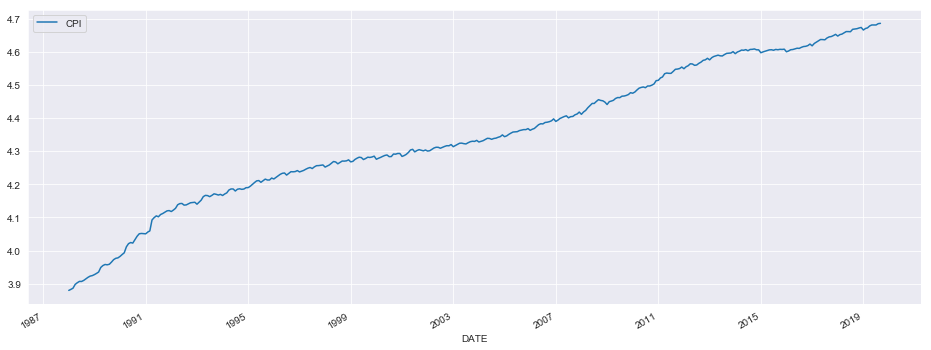

In [12]:
plt.rc("figure", figsize=(16,6))
lncpi.plot.line()

In [13]:
# Starting with no trend components
adf = ADF(lncpi, trend="n")
adf.summary()

Test Statistic,1.829
P-value,0.985
Lags,14


In [14]:
# Including a constant
adf = ADF(lncpi, trend="c")
adf.summary()

Test Statistic,-1.382
P-value,0.591
Lags,14


In [15]:
# Including a constant and a linear trend
adf = ADF(lncpi, trend="ct")
adf.summary()

Test Statistic,-3.972
P-value,0.010
Lags,14


In [16]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     35.38
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           3.66e-63
Time:                        19:44:20   Log-Likelihood:                 1668.8
No. Observations:                 366   AIC:                            -3304.
Df Residuals:                     349   BIC:                            -3237.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0200      0.005     -3.972      0.000      -0.030      -0.010
Diff.L1        0.0845      0.052      1.615      0.107      -0.018       0.187
Diff.L2        0.0731      0.052      1.406      0.161      -0.029       0.175
Diff.L3       -0.0121      0.037     -0.325      0.745      -0.085       0.061
Diff.L4       -0.0073      0.037     -0.196      0.845      -0.080       0.066
Diff.L5       -0.0623      0.037     -1.680      0.094      -0.135       0.011
Diff.L6        0.1141      0.037      3.063      0.002       0.041       0.187
Diff.L7        0.0251      0.038      0.666      0.506      -0.049       0.099
Diff.L8        0.0085      0.038      0.226      0.821      -0.066       0.083
Diff.L9       -0.0385      0.037     -1.030      0.304      -0.112       0.035
Diff.L10      -0.0200      0.037     -0.535      0.593      -0.093       0.054
Diff.L11       0.0230      0.037      0.614      0.539      -0.051       0.096
Diff.L12       0.6888      0.037     18.498      0.000       0.616       0.762
Diff.L13      -0.1277      0.052     -2.447      0.015      -0.230      -0.025
Diff.L14      -0.1137      0.052     -2.167      0.031      -0.217      -0.011
const          0.0819      0.020      4.009      0.000       0.042       0.122
trend       3.419e-05      9e-06      3.798      0.000    1.65e-05    5.19e-05
==============================================================================
Omnibus:                       93.523   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1069.844
Skew:                           0.695   Prob(JB):                    4.86e-233
Kurtosis:                      11.260   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""